In [103]:
import numpy as np #numpy is used for linear algebra
import pandas as pd #Pandas are use to read CSV Files
import seaborn; seaborn.set() #
from sklearn.metrics import mean_squared_error #Skleaen is used for Calculation for mean square error
import matplotlib.pylab as plt #matplotlib is used for data visulization
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller # used to test for a unit root in a univariate process in the presence of serial correlation.
from statsmodels.tsa.seasonal import seasonal_decompose #Seasonal decomposition using moving averages.
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.arima_model import ARIMA #Statsmodels is used to import Arima model


In [71]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Book1.csv to Book1.csv


In [104]:
data = pd.read_csv("Book1.csv") #Read The data Set
print(data.head(5)) #Cheching The First 5 data set
print(data.tail(5)) #Cheching The Last 5 data set
data.dtypes #Checking The Data Type
data.info() #Checking datatype and colum name
data.describe() #Gives The Stats Value mean , standard deviation ,minimum , maximum

        Date      Open  ...               Volume            Market Cap
0  29-May-21  35684.16  ...   45,231,013,335.00    648,061,013,208.00 
1  28-May-21  38507.08  ...   55,200,191,952.00    668,283,930,067.00 
2  27-May-21  39316.89  ...   43,210,968,721.00    719,538,129,128.00 
3  26-May-21  38392.62  ...   51,346,735,160.00    735,556,411,166.00 
4  25-May-21  38795.78  ...   56,211,915,803.00    718,829,377,408.00 

[5 rows x 7 columns]
           Date    Open    High  ...   Close           Volume          Market Cap
1852   3-May-16  444.73  451.10  ...  450.30   59,366,400.00    6,980,826,502.00 
1853   2-May-16  451.93  452.45  ...  444.67   92,127,000.00    6,891,791,430.00 
1854   1-May-16  448.48  452.48  ...  451.88   40,660,100.00    7,001,712,750.00 
1855  30-Apr-16  455.18  455.59  ...  448.32   69,322,600.00    6,944,860,514.00 
1856  29-Apr-16  449.41  455.38  ...  455.10   49,258,500.00    7,048,201,013.00 

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close
count,1857.000000,1857.000000,1857.000000,1857.000000
mean,9844.533630,10126.894416,9535.285611,9862.459882
std,12427.964992,12825.005538,11958.209412,12438.542012
min,437.790000,443.430000,437.390000,438.710000
25%,3166.300000,3290.010000,2946.620000,3213.940000
50%,7129.460000,7312.000000,6920.160000,7143.580000
75%,10126.300000,10304.620000,9737.880000,10131.520000
max,63523.750000,64863.100000,62208.960000,63503.460000


In [105]:
data = pd.read_csv("Book1.csv",index_col= 'Date')
print(data.head(5)) 
data.info()
data.index = pd.to_datetime(data.index) #Changing date type where year comes first dates in last
print(data.index)
data.head(5)

               Open      High  ...               Volume            Market Cap
Date                           ...                                           
29-May-21  35684.16  37234.50  ...   45,231,013,335.00    648,061,013,208.00 
28-May-21  38507.08  38856.97  ...   55,200,191,952.00    668,283,930,067.00 
27-May-21  39316.89  40379.62  ...   43,210,968,721.00    719,538,129,128.00 
26-May-21  38392.62  40782.08  ...   51,346,735,160.00    735,556,411,166.00 
25-May-21  38795.78  39776.35  ...   56,211,915,803.00    718,829,377,408.00 

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1857 entries, 29-May-21 to 29-Apr-16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1857 non-null   float64
 1   High        1857 non-null   float64
 2   Low         1857 non-null   float64
 3   Close       1857 non-null   float64
 4   Volume      1857 non-null   object 
 5   Market Cap  1857 non-null 

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-05-29,35684.16,37234.50,33693.93,34616.07,"45,231,013,335.00","648,061,013,208.00"
2021-05-28,38507.08,38856.97,34779.04,35697.61,"55,200,191,952.00","668,283,930,067.00"
2021-05-27,39316.89,40379.62,37247.90,38436.97,"43,210,968,721.00","719,538,129,128.00"
2021-05-26,38392.62,40782.08,37905.83,39294.20,"51,346,735,160.00","735,556,411,166.00"
2021-05-25,38795.78,39776.35,36581.43,38402.22,"56,211,915,803.00","718,829,377,408.00"


In [106]:
data = data.sort_index() #Sorting the data from old to recent
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-04-29,449.41,455.38,446.02,455.10,"49,258,500.00","7,048,201,013.00"
2016-04-30,455.18,455.59,447.70,448.32,"69,322,600.00","6,944,860,514.00"
2016-05-01,448.48,452.48,447.93,451.88,"40,660,100.00","7,001,712,750.00"
2016-05-02,451.93,452.45,441.78,444.67,"92,127,000.00","6,891,791,430.00"
2016-05-03,444.73,451.10,442.62,450.30,"59,366,400.00","6,980,826,502.00"


Text(0, 0.5, 'Daily Bitcoin price')

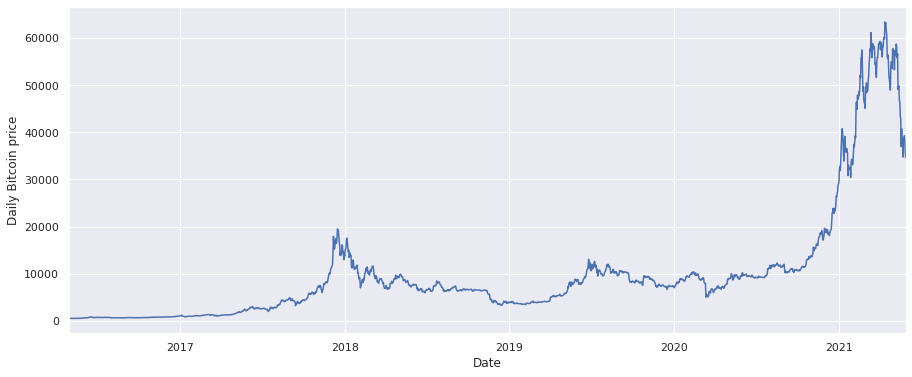

In [107]:
data['Close'].plot()
plt.ylabel("Daily Bitcoin price") #Ploting the close price of a bit by year 

In [108]:
ts = data

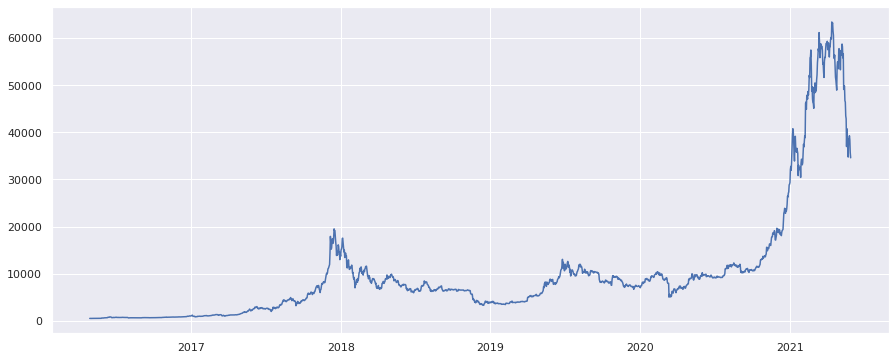

In [81]:
plt.plot(ts)

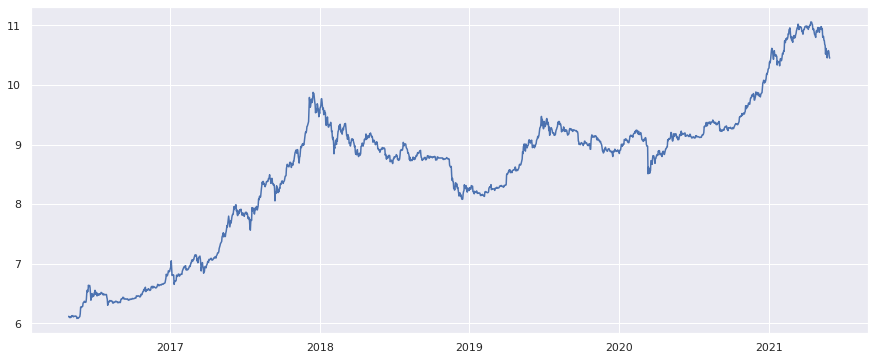

In [82]:
ts_logtransformed = np.log(ts) # np.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.
plt.plot(ts_logtransformed)

Date
2016-04-29         NaN
2016-04-30         NaN
2016-05-01         NaN
2016-05-02         NaN
2016-05-03         NaN
2016-05-04         NaN
2016-05-05         NaN
2016-05-06    0.009839
2016-05-07    0.022540
2016-05-08    0.014653
Name: Close, dtype: float64

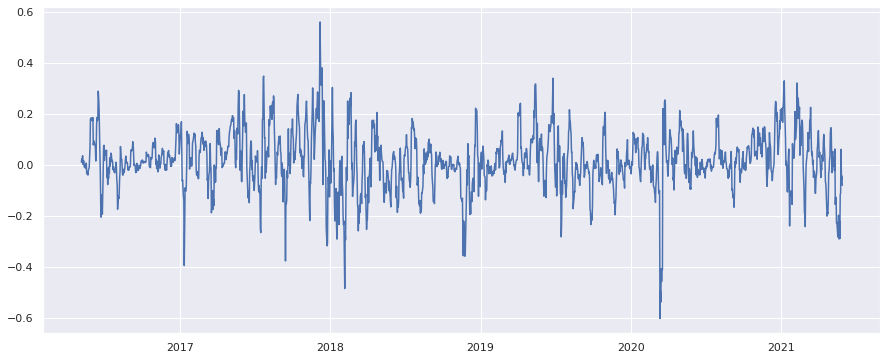

In [83]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


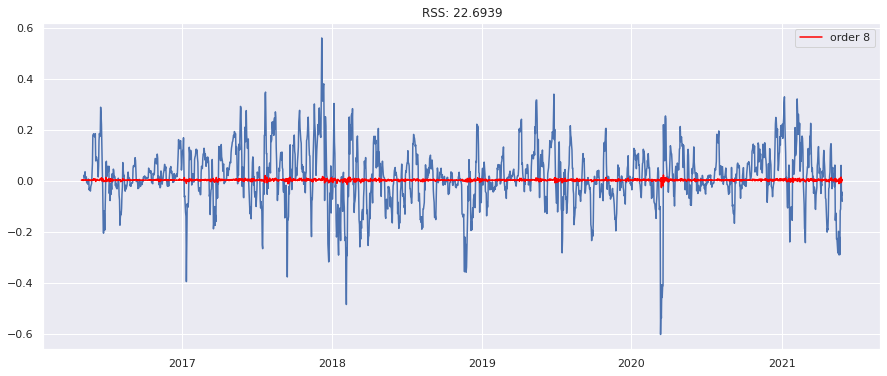

In [84]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

In [85]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1856
Model:                 ARIMA(8, 1, 0)   Log Likelihood                3299.694
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 30 May 2021   AIC                          -6579.387
Time:                        16:43:00   BIC                          -6524.125
Sample:                    04-30-2016   HQIC                         -6559.019
                         - 05-29-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.001      2.299      0.022       0.000       0.004
ar.L1.D.Close    -0.0285      0.023     -1.226      0.220      -0.074       0.017
ar.L2.D.Close     0.0471      0.023     

In [96]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Book2.csv to Book2.csv


In [109]:
test = pd.read_csv("Book2.csv",index_col= 'Date') #test data set for price forecasting
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2021-08-07    3378.94
2021-08-08    3213.94
2021-08-09    3252.91
2021-08-10    2895.89
2021-08-11    2804.73
2021-08-12    2710.67
2021-08-13    2718.26
Name: Close, dtype: float64

In [111]:
dates = [pd.Timestamp('2021-08-01'), pd.Timestamp('2021-08-02'), pd.Timestamp('2021-08-03'),pd.Timestamp('2021-08-04'), pd.Timestamp('2021-08-05'), pd.Timestamp('2021-08-06'), pd.Timestamp('2021-08-07')]

forecast = pd.Series(results_AR.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast) #Forecasting price by Arima model
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2021-08-01    34851.099903
2021-08-02    34769.172329
2021-08-03    34842.599853
2021-08-04    34772.991000
2021-08-05    34732.402973
2021-08-06    34848.777217
2021-08-07    34974.325628
dtype: float64
Test MSE: 1013282230.899


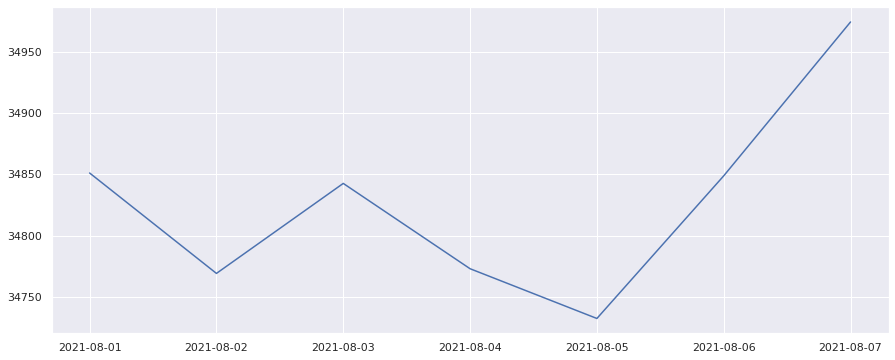

In [112]:
plt.plot(forecast)